In [229]:
import sys
import math
del sys.modules['feature']
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import feature as ft
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA

In [226]:
#df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")
#df = pd.read_csv("Daten/Fiona_21.06.csv",sep=",")
df = pd.read_csv("Daten/Vanessa_22.06.csv",sep=",")
df = df[(df['Timestamp'].between(160, 165) == True)].reset_index()
df['Gaze Y'] = df['Gaze Y'].fillna(0)
df['Gaze X'] = df['Gaze X'].fillna(0)
df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
df['Lost Track'] = df['Lost Track'].notna().astype(int)
# Zeit in MS
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)


# Generiert Geschwindigkeit
df_ges = ft.ges(df)
df = pd.concat([df,df_ges],axis=1)

### Filter
 #and (df_new["dy"] > 0) == True and df_new["dx"] <= 10 == True and df_new["dx"] >= -10 == True
#df_new['dx'] = np.sqrt(df_new['dx'] ** 2)
#df_new = df_new.loc[(df_new["dx"] >= 10) & (df_new["dx"] >= -10) == True]
#df_new = df_new.loc[(df_new["dy"] >= 20 * df_new["dx"]) & (df_new["dy"] > 0) == False]
#df_new = df_new.loc[(df_new["vx"] < -10) & (df_new["vx"] > 10) == False]
#df_new = df_new.loc[(df_new["vy"] <= 2500) & (df_new['vx'] >= 100) == True]
df = df[(df["Gaze Y"] <= 1030) == True].reset_index().drop(['level_0'], axis=1)
df['Fixation'] = ft.fix(df)
df = df.loc[(df['v'] == 0) & (df['Fixation'] == 0) == False].reset_index().drop(['level_0'], axis=1)
df

# Sakkaden
df_sacc = ft.sac(df)
df = pd.concat([df.reset_index().drop(["level_0"], axis=1), df_sacc], axis=1, )

# Lost Track Dauer
df_ltt = ft.lost_t(df)
df  = pd.concat([df.reset_index().drop(["level_0"], axis=1), df_ltt], axis=1, )

df.drop(df.tail(1).index,inplace=True)
df

,index,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation,Saccades,Saccade Duration,Lost Track Dauer
0,5071,5071,160.014899,268,223,0,TrackingConfidence.HIGH,160014,33.0,6.0,33.541020,1096.915052,199.439100,1114.898464,1.390943,1.0,0.0,0.0,0
1,5072,5072,160.044983,301,229,0,TrackingConfidence.HIGH,160044,-1.0,-20.0,20.024984,-31.647004,632.940076,633.730757,-0.049958,1.0,0.0,0.0,0
2,5073,5073,160.076581,300,209,0,TrackingConfidence.HIGH,160076,7.0,-27.0,27.892651,225.080135,868.166234,896.868818,0.253674,1.0,0.0,0.0,0
3,5074,5074,160.107682,307,182,0,TrackingConfidence.HIGH,160107,94.0,464.0,473.425813,3021.485481,14914.566631,15217.544884,0.199881,1.0,0.0,0.0,0
4,5075,5075,160.138792,401,646,0,TrackingConfidence.HIGH,160138,729.0,433.0,847.897399,23092.619902,13716.192617,26858.946998,1.034827,0.0,1.0,157.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,5225,5225,164.836019,1038,289,0,TrackingConfidence.HIGH,164836,-17.0,-34.0,38.013156,-531.648993,1063.297986,1188.803289,-0.463648,17.0,0.0,0.0,0
137,5226,5226,164.867995,1021,255,0,TrackingConfidence.HIGH,164867,52.0,-9.0,52.773099,1657.714264,286.912084,1682.359987,1.399417,17.0,0.0,0.0,0
138,5227,5227,164.899364,1073,246,0,TrackingConfidence.HIGH,164899,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,0.0,0.0,0
139,5228,5228,164.929870,1073,246,0,TrackingConfidence.HIGH,164929,1.0,0.0,1.000000,31.333044,0.000000,31.333044,1.570796,17.0,0.0,0.0,0


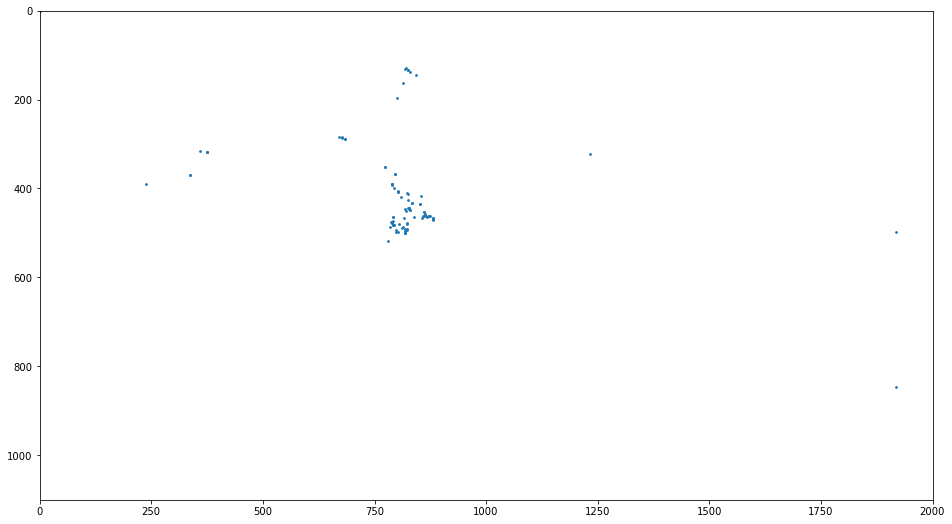

In [69]:
#df = df[(df['Timestamp'].between(30,40) == True)]
x = df["Gaze X"]
y = df["Gaze Y"]
#z = df2['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 3)
plt.show()

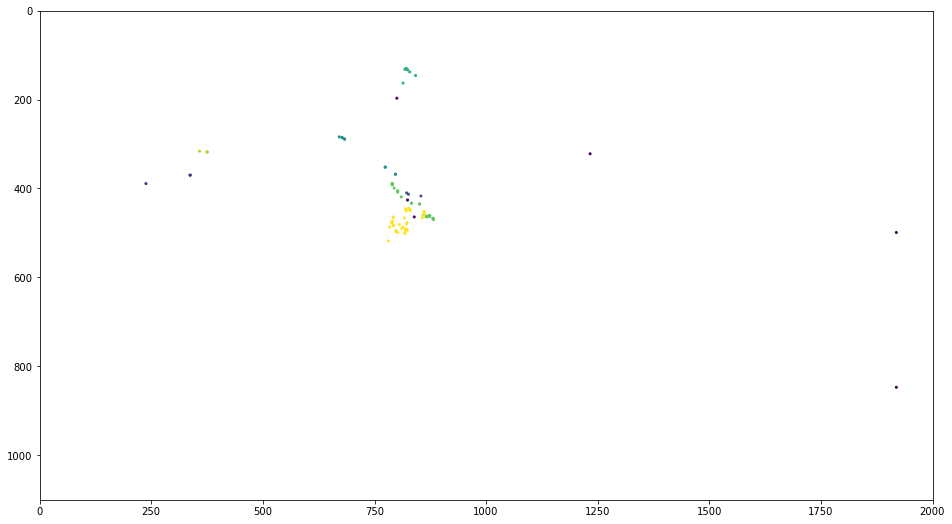

In [70]:
#df_filter = df_new[(df_new['Timestamp'].between(160,165) == True)]
#df_filter = df_filter[(df_new["Fixation"] == 0) == True]
x = df["Gaze X"]
y = df["Gaze Y"]
z = df['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 4, c=z)
plt.show()

In [224]:
df_final = pd.read_csv('feature.csv')
df_final.drop(['Unnamed: 0'], axis=1)

,Cliplänge in Sekunden,Anzahl Sakkaden,Gesamt Dauer Sakkaden,Anzahl Lost Tracks,Dauer Lost Tracks,Anzahl Fixationen,Gesamt Dauer Fixationen,Name
0,5.0,2.0,58.0,0.0,0.0,4.0,4.942,Vanessa_22.06.csv
1,5.0,5.0,187.0,0.0,0.0,7.0,4.813,Ole_20.06.csv
2,5.0,4.0,757.0,1.0,633.0,8.0,3.610,Merle_22.06.csv
3,5.0,28.0,1035.0,0.0,0.0,23.0,3.965,Nils_21.06.csv
4,5.0,6.0,185.0,0.0,0.0,6.0,4.815,Annika_20.06.csv
5,5.0,5.0,261.0,0.0,0.0,6.0,4.739,Robin_22.06.csv
6,5.0,7.0,217.0,0.0,0.0,8.0,4.783,Fiona_21.06.csv
7,5.0,12.0,1510.0,1.0,1087.0,10.0,2.403,Neele_20.06.csv
8,5.0,19.0,832.0,0.0,0.0,17.0,4.168,Jannis_16_06.csv


   Unnamed: 0  Cliplänge in Sekunden  Anzahl Sakkaden  Gesamt Dauer Sakkaden  \
0           0                    5.0             19.0                  832.0   
1           1                    5.0             12.0                 1510.0   
2           2                    5.0              7.0                  217.0   
3           3                    5.0              5.0                  261.0   
4           4                    5.0              6.0                  185.0   
5           5                    5.0             28.0                 1035.0   
6           6                    5.0              4.0                  757.0   
7           7                    5.0              5.0                  187.0   
8           8                    5.0              2.0                   58.0   

   Anzahl Lost Tracks  Dauer Lost Tracks  Anzahl Fixationen  \
0                 0.0                0.0               17.0   
1                 1.0             1087.0               10.0   
2         

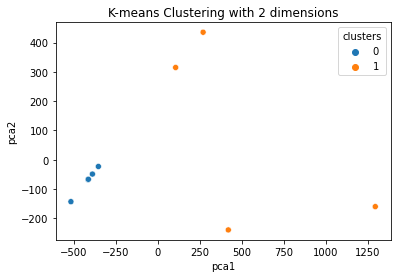

In [234]:
df = pd.read_csv('feature.csv')

kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(df[['Anzahl Sakkaden', 'Gesamt Dauer Sakkaden', 'Anzahl Lost Tracks',
                                      'Dauer Lost Tracks','Anzahl Fixationen','Gesamt Dauer Fixationen']])

df['clusters'] = y

print(df)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df[['Anzahl Sakkaden', 'Gesamt Dauer Sakkaden', 'Anzahl Lost Tracks',
                                      'Dauer Lost Tracks','Anzahl Fixationen','Gesamt Dauer Fixationen']])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()